### About the data set
The data is a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3 from: 
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Goal**: Predict which customers are likely to leave.

**Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv(r'Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()
# TotalCharges should be numeric not an object
# this will be problematic when scaling if not fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [6]:
df[df['tenure'] == 0]
#there is no total charges in this
# should I drop them?

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# list of numerical columns
num_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']

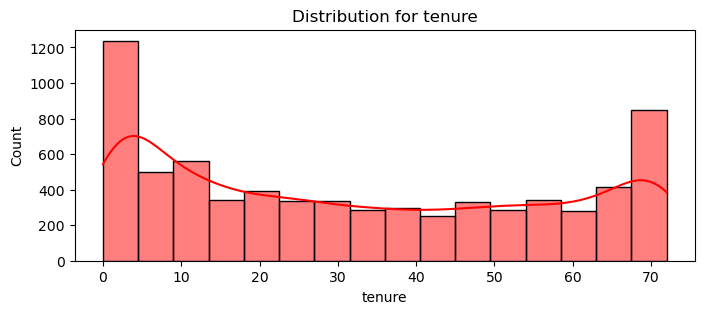

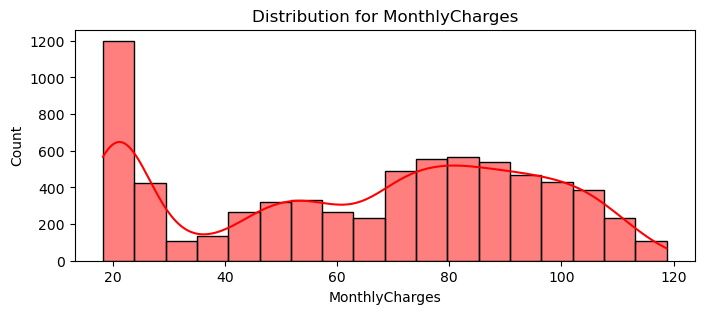

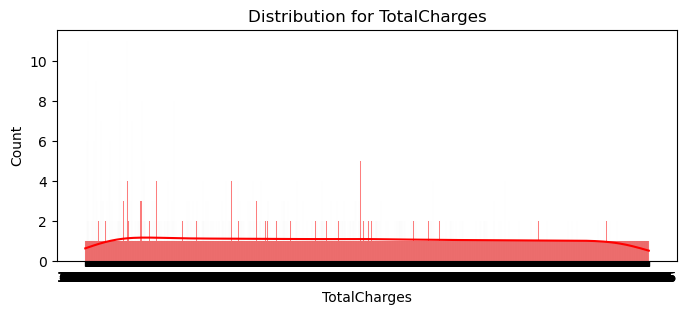

In [8]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title(f"Distribution for {feature}")
    sns.histplot(frame[feature], kde=True, color=color)


# Call distplot for each
for feat in num_cols:
    distplot(feat, df)
# before converting to float

In [9]:
# See what values are in your numerical columns
for col in num_cols:
    print(f"Unique values in column '{col}':", df[col].unique())

Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'MonthlyCharges': [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Unique values in column 'TotalCharges': ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [10]:
# removing any white space then convert to float
df['TotalCharges']= df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
df['TotalCharges']= df['TotalCharges'].astype(float)

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df[df['TotalCharges'].isna()]
# same rows where tenure = 0  (I put it above this)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
# dropping the missing values they are just 11 so won't affect the training this much plus the tenure was zero and I didn't feel comfortable with it
df['TotalCharges']= df['TotalCharges'].dropna()

In [14]:
df['Churn'].value_counts()
# unbalanced dataset

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [16]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [17]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

### Preprocessing

In [18]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [19]:
# list of numerical columns
num_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(df.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [20]:
cat_cols_le

['customerID',
 'OnlineSecurity',
 'PaperlessBilling',
 'TechSupport',
 'StreamingTV',
 'MultipleLines',
 'gender',
 'Partner',
 'StreamingMovies',
 'DeviceProtection',
 'Churn',
 'PhoneService',
 'SeniorCitizen',
 'Dependents',
 'OnlineBackup']

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df[cat_cols_le]:
    df[i] = le.fit_transform(df[i].astype(str))
    label_eccndoer= le

In [22]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
## Encoding categorical features
#for i in df.columns:
#    if df[i].dtype=='object':
#        df[i] = le.fit_transform(df[i].astype(str))
#        label_eccndoer= le

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,DSL,2,...,2,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,DSL,2,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,DSL,2,...,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [24]:
from sklearn.preprocessing import OneHotEncoder

hot= OneHotEncoder(sparse_output=False)
for c in cat_cols_ohe:
    transformed = hot.fit_transform(df[[c]].astype(str))  # double brackets to keep it 2D
    ohe_df = pd.DataFrame(transformed, columns=[f"{c}_{cat}" for cat in hot.categories_[0]], index=df.index) # make sure index matches
    df = df.drop(columns=c).join(ohe_df)

# I wanna see if this will improve the accuracy of my models more than my other trials when I only used label encoding

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,5365,0,0,1,0,1,0,1,0,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3953,1,0,0,0,34,1,0,2,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2558,1,0,0,0,2,1,0,2,2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,5524,1,0,0,0,45,0,1,2,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,6500,0,0,0,0,2,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [26]:
print(f"Before joining: df shape = {df.shape}, ohe_df shape = {ohe_df.shape}")
print(f"Matching indices: {df.index.equals(ohe_df.index)}")


Before joining: df shape = (7032, 28), ohe_df shape = (7032, 3)
Matching indices: True


In [27]:
df.isna().sum() # if ohe_df and df ever get misaligned, NaNs will be introduced.

customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Contract_M

### Train, Test Split

In [28]:
X= df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Sampling & Scaling

In [30]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

from sklearn .preprocessing import StandardScaler
scaler= StandardScaler()
X_train[num_cols]= scaler.fit_transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

In [31]:
pd.DataFrame(X_train)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,0,0,0.635651,0,1,0,0,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,0,-1.030955,1,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,1,0,1.135632,1,2,0,0,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0,1,1,0.718981,1,0,2,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,0,1,1,1.135632,1,2,2,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,0,0,1,0,0.802311,1,0,0,0,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8256,0,0,1,0,1.468954,1,2,0,2,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8257,0,1,0,0,-1.114285,1,0,0,2,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8258,1,0,1,0,0.052339,1,2,2,2,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


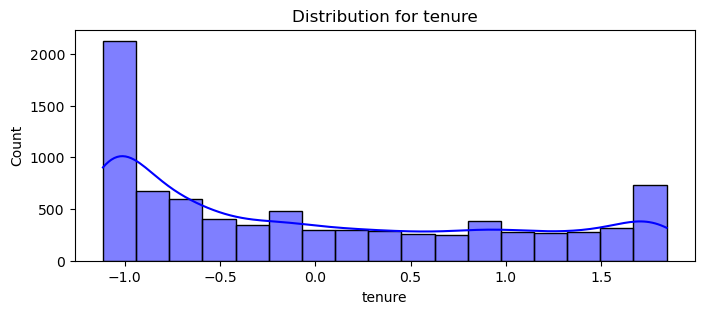

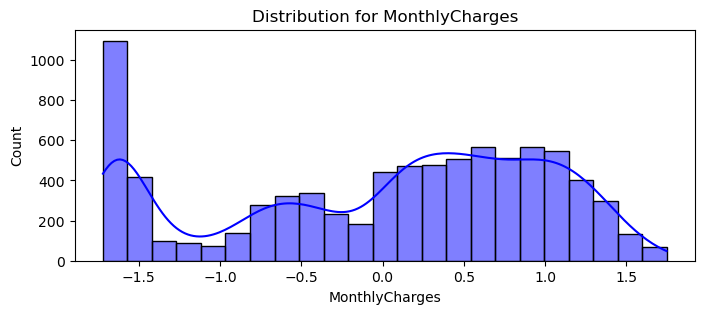

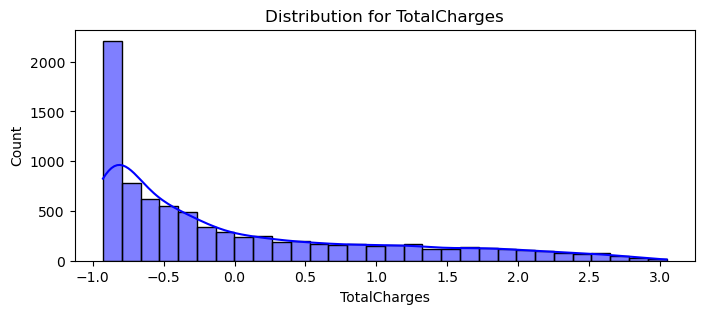

In [32]:
for feat in num_cols:
    distplot(feat, X_train, color='b') # scaled

In [33]:
# was for dealing with the nans but I figured it out so no need


# from sklearn.impute import SimpleImputer
# 
# # For numerical columns
# num_imputer = SimpleImputer(strategy='mean')  # or 'median'
# X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
# X_test[num_cols] = num_imputer.transform(X_test[num_cols])
# 
# # For categorical columns (if you have any)
# cat_cols = [col for col in X_train.columns if col not in num_cols]
# cat_imputer = SimpleImputer(strategy='most_frequent')
# X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
# X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

after converting to float and Standardizing numeric attributes

In [34]:
y_train.value_counts()


Churn
1    4130
0    4130
Name: count, dtype: int64

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [36]:
classifiers= {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(n_neighbors=3),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'xgb': XGBClassifier(),
    'svm': SVC(probability=True)
}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification report for {name}:")
    print('==================================================')
    print(classification_report(y_test, y_pred))

# rf is the best model but the score is not enough


d:\Programing\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for lr:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

Classification report for knn:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1033
           1       0.46      0.67      0.54       374

    accuracy                           0.70      1407
   macro avg       0.66      0.69      0.66      1407
weighted avg       0.75      0.70      0.72      1407

Classification report for dt:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1033
           1       0.47      0.49      0.48       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64    

after some trials and adjustments
- The highest accuracy was 77% using random forest with a recall and precision of 0.56, 0.57 respectivly for the minorty class 
- xgboost performed accuracy of 75%
- logistic regression with 73% while having the highest recall 79% for the minorty
- SVM with 73%
- decision trees with 72%
- KNN with 70%